In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Heart Disease Kaggle Dataset:
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [2]:
url = 'https://raw.githubusercontent.com/futagoya/5-data-analysis-heart-disease/main/heart.csv'
data = pd.read_csv(url)

# 1. Show top and bottom rows of dataset

In [38]:
data.sort_values(by='age', ascending=False).head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
160,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
99,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
313,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
269,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
287,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
402,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1
328,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0
33,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [3]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# 2. Check the null values of dataset

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 3. Drop duplicate values

In [6]:
data=data.drop_duplicates()

# 4. Visualization Data Correlation

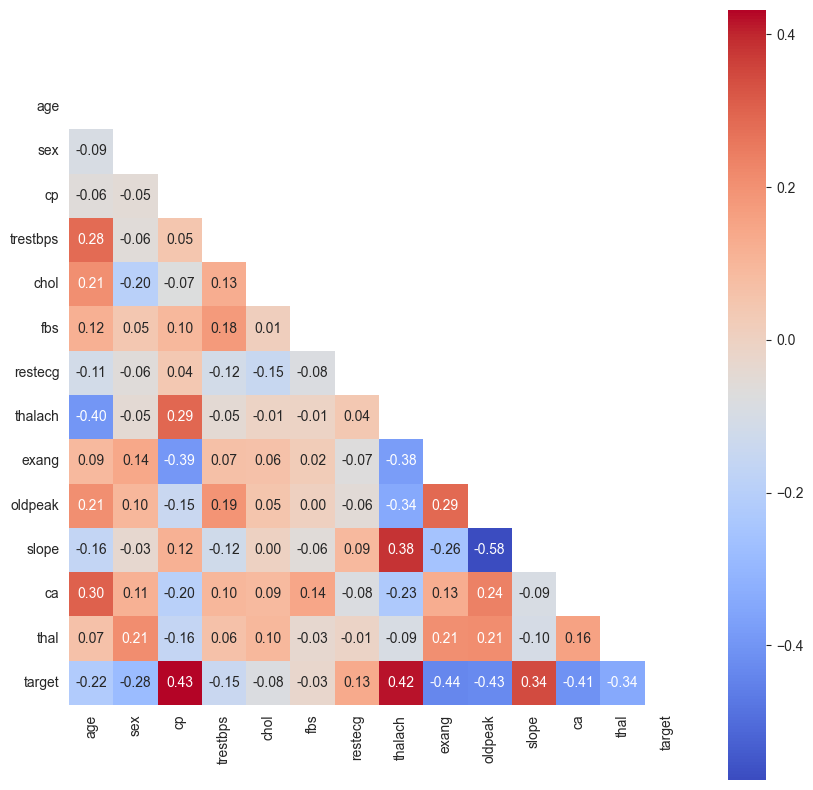

In [7]:
correlation_matrix=data.corr()
sns.set_style("white")
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, square=True, ax=ax)
plt.show()

### or we can use heatmap

<Axes: >

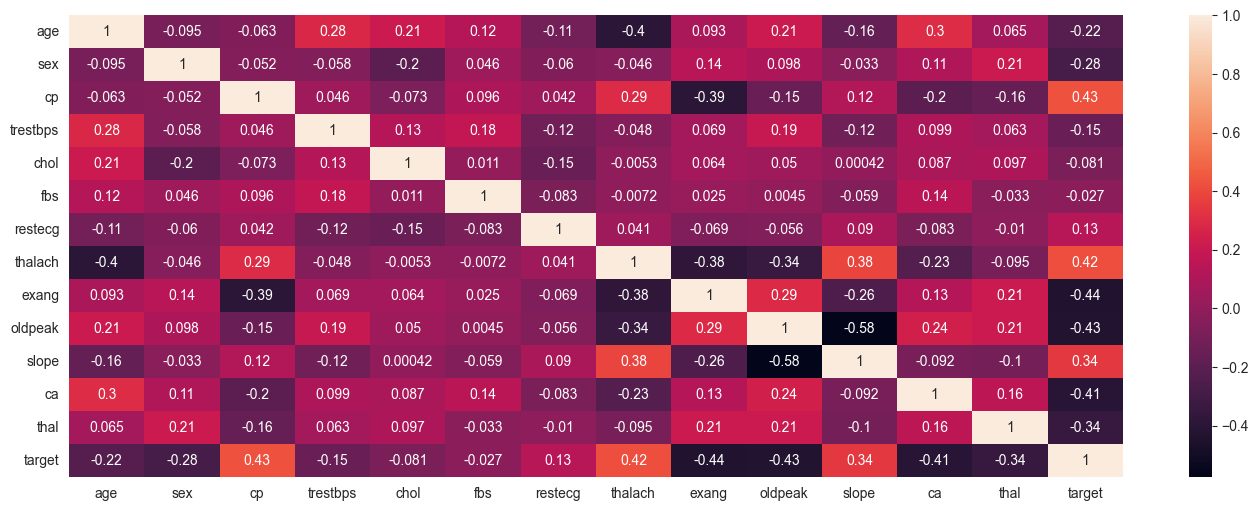

In [8]:
plt.figure(figsize=(17,6))
sns.heatmap(correlation_matrix, annot=True)

# 5. 'People which has heart disease or not' visualization

In [9]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

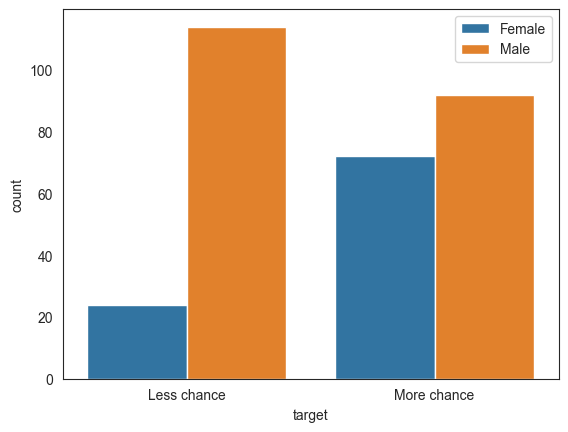

In [10]:
sns.countplot(x=data['target'], hue=data['sex'])
plt.xticks([0,1],['Less chance','More chance'])
plt.legend(labels=['Female','Male'])
plt.show()

### Let's change the style 

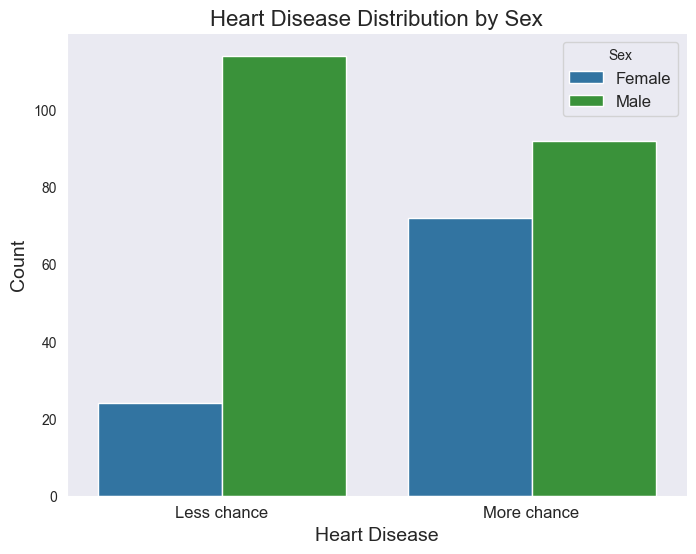

In [21]:
# set the style of the plot
sns.set_style("dark")
custom_palette = sns.color_palette(['#1f77b4', '#2ca02c'])

# create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# create the countplot
sns.countplot(x=data['target'], hue=data['sex'], palette=custom_palette, ax=ax)

# set the labels and legend
ax.set_xticklabels(['Less chance', 'More chance'], fontsize=12)
ax.set_xlabel('Heart Disease', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(title='Sex', labels=['Female', 'Male'], fontsize=12)

# add a title to the plot
ax.set_title('Heart Disease Distribution by Sex', fontsize=16)

# remove the top and right spines
sns.despine()

# show the plot
plt.show()

# 6. Age distribution of Heart Disease

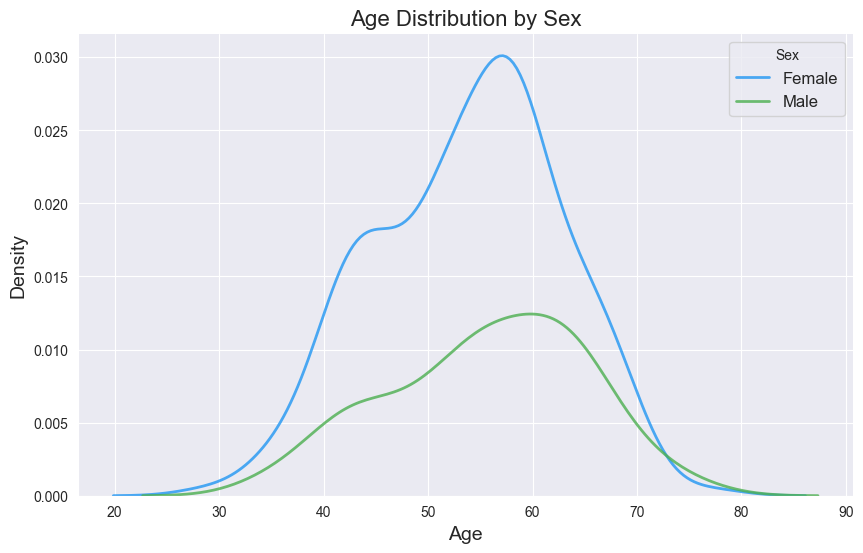

In [12]:
# set the style and color palette of the plot
sns.set_style("darkgrid")
palette = sns.color_palette(["#4CAF50", "#2196F3"])
sns.set_palette(palette)

# create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# create the distribution plot
sns.kdeplot(data=data, x="age", hue="sex", multiple='layer', palette=palette, alpha=0.8, linewidth=2, ax=ax)

# set the labels and legend
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.legend(title='Sex', labels=['Female', 'Male'], fontsize=12)

# add a title to the plot
ax.set_title('Age Distribution by Sex', fontsize=16)

# remove the top and right spines
sns.despine()

# show the plot
plt.show()

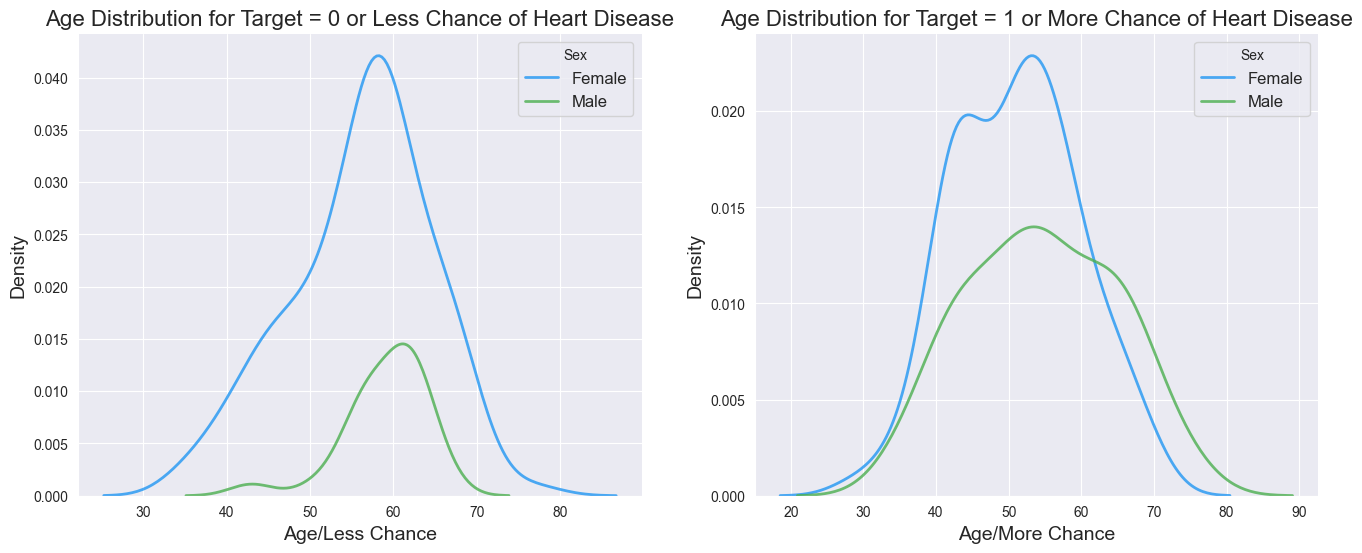

In [22]:
# set the custom color palette
palette = sns.color_palette(["#4CAF50", "#2196F3"])

# set the style and color palette of the plot
sns.set_style("darkgrid")
sns.set_palette(palette)

# create a figure and axis object with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# create the distribution plots for target = 0 and target = 1
sns.kdeplot(data=data[data['target']==0], x="age", hue="sex", multiple="layer", alpha=0.8, linewidth=2, ax=ax1)
sns.kdeplot(data=data[data['target']==1], x="age", hue="sex", multiple="layer", alpha=0.8, linewidth=2, ax=ax2)

# set the labels and legends for each subplot
ax1.set_xlabel('Age/Less Chance', fontsize=14)
ax1.set_ylabel('Density', fontsize=14)
ax1.set_title('Age Distribution for Target = 0 or Less Chance of Heart Disease', fontsize=16)
ax1.legend(title='Sex', labels=['Female', 'Male'], fontsize=12)

ax2.set_xlabel('Age/More Chance', fontsize=14)
ax2.set_ylabel('Density', fontsize=14)
ax2.set_title('Age Distribution for Target = 1 or More Chance of Heart Disease', fontsize=16)
ax2.legend(title='Sex', labels=['Female', 'Male'], fontsize=12)

# remove the top and right spines from each subplot
sns.despine(ax=ax1)
sns.despine(ax=ax2)

# show the plot
plt.show()

# 7. Chest pain type visualization

In [14]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

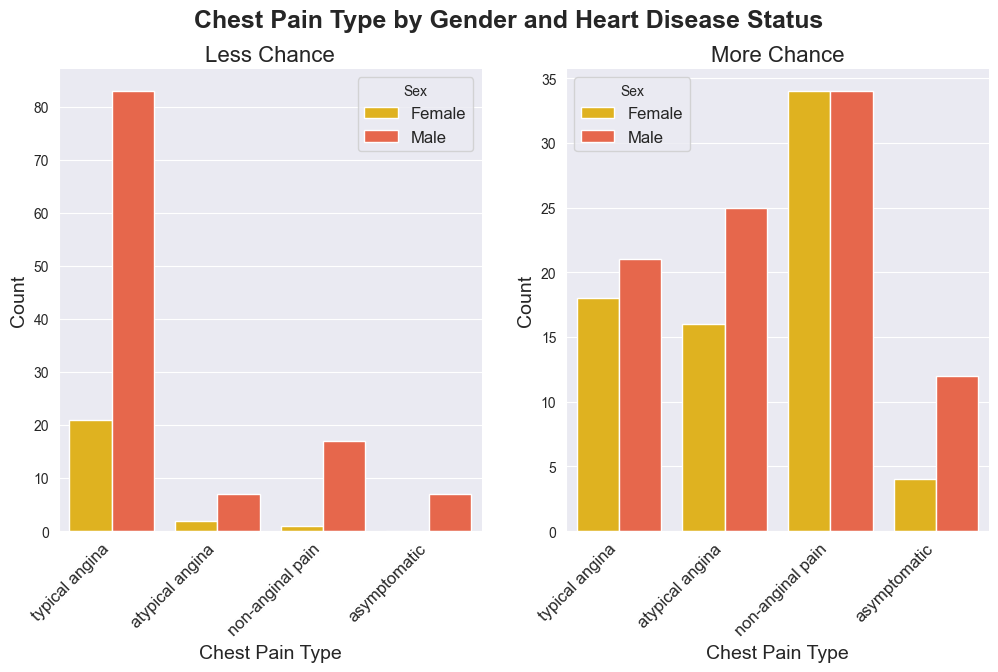

In [15]:
# create a custom color palette with shades of orange and red
palette = sns.color_palette(["#FFC300", "#FF5733"])

# set the style and color palette of the plot
sns.set_style("darkgrid")
sns.set_palette(palette)

# create a figure and axis object with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# create the count plots for target = 0 and target = 1
sns.countplot(x=data[data['target']==0]['cp'], hue=data[data['target']==0]['sex'], palette=palette, ax=ax1)
sns.countplot(x=data[data['target']==1]['cp'], hue=data[data['target']==1]['sex'], palette=palette, ax=ax2)

# set the labels and legends for each subplot
ax1.set_xlabel('Chest Pain Type', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.set_title('Less Chance', fontsize=16)
ax1.legend(title='Sex', labels=['Female', 'Male'], fontsize=12)

ax2.set_xlabel('Chest Pain Type', fontsize=14)
ax2.set_ylabel('Count', fontsize=14)
ax2.set_title('More Chance', fontsize=16)
ax2.legend(title='Sex', labels=['Female', 'Male'], fontsize=12)

# remove the top and right spines from each subplot
sns.despine(ax=ax1)
sns.despine(ax=ax2)

# set the x-tick labels for the chest pain types
for ax in [ax1, ax2]:
    ax.set_xticklabels(['typical angina','atypical angina','non-anginal pain','asymptomatic'], fontsize=12, rotation=45, ha='right')

# set the title
plt.suptitle('Chest Pain Type by Gender and Heart Disease Status', fontsize=18, fontweight='bold')
    
# show the plot
plt.show()

# 8. Fasting blood pressure visualization

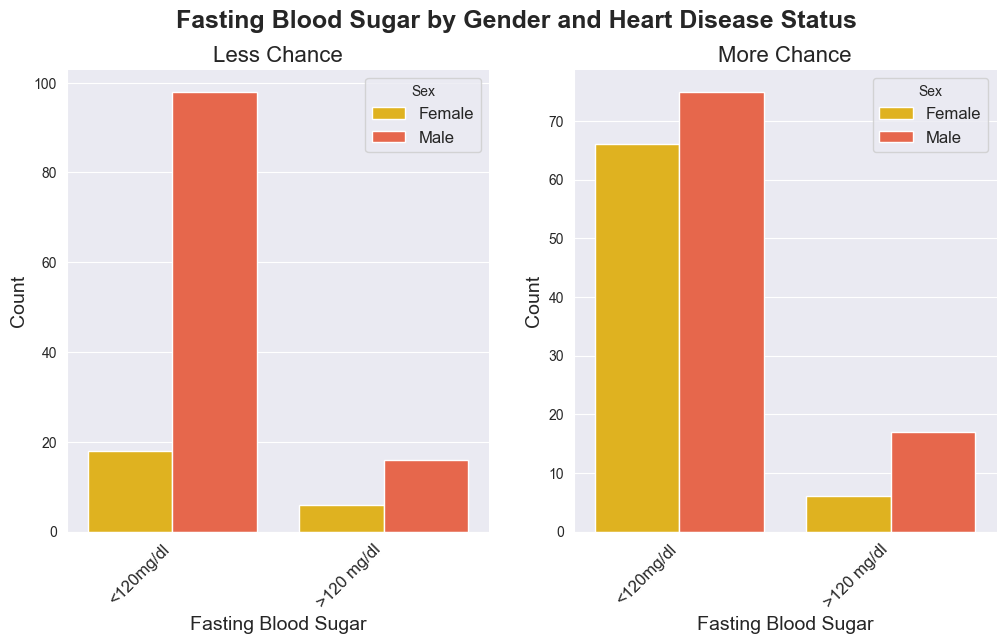

In [16]:
# create a custom color palette with shades of orange and red
palette = sns.color_palette(["#FFC300", "#FF5733"])

# set the style and color palette of the plot
sns.set_style("darkgrid")
sns.set_palette(palette)

# create a figure and axis object with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# create the count plots for target = 0 and target = 1
sns.countplot(x=data[data['target']==0]['fbs'], hue=data[data['target']==0]['sex'], palette=palette, ax=ax1)
sns.countplot(x=data[data['target']==1]['fbs'], hue=data[data['target']==1]['sex'], palette=palette, ax=ax2)

# set the labels and legends for each subplot
ax1.set_xlabel('Fasting Blood Sugar', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.set_title('Less Chance', fontsize=16)
ax1.legend(title='Sex', labels=['Female', 'Male'], fontsize=12)

ax2.set_xlabel('Fasting Blood Sugar', fontsize=14)
ax2.set_ylabel('Count', fontsize=14)
ax2.set_title('More Chance', fontsize=16)
ax2.legend(title='Sex', labels=['Female', 'Male'], fontsize=12)

# remove the top and right spines from each subplot
sns.despine(ax=ax1)
sns.despine(ax=ax2)

# set the x-tick labels for the fasting blood sugar values
for ax in [ax1, ax2]:
    ax.set_xticklabels(['<120mg/dl','>120 mg/dl'], fontsize=12, rotation=45, ha='right')

# set the title
plt.suptitle('Fasting Blood Sugar by Gender and Heart Disease Status', fontsize=18, fontweight='bold')

# show the plot
plt.show()

# 9. Resting Blood Pressure visualization

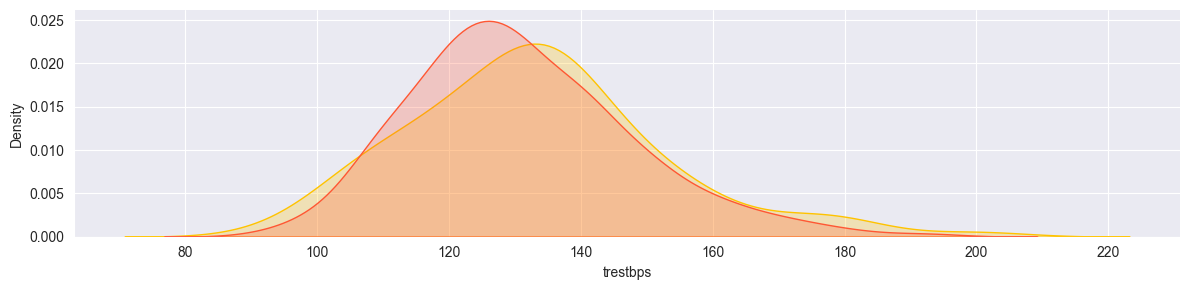

In [17]:
g = sns.FacetGrid(data,hue='sex',aspect=4)
g.map(sns.kdeplot, 'trestbps',shade=True )

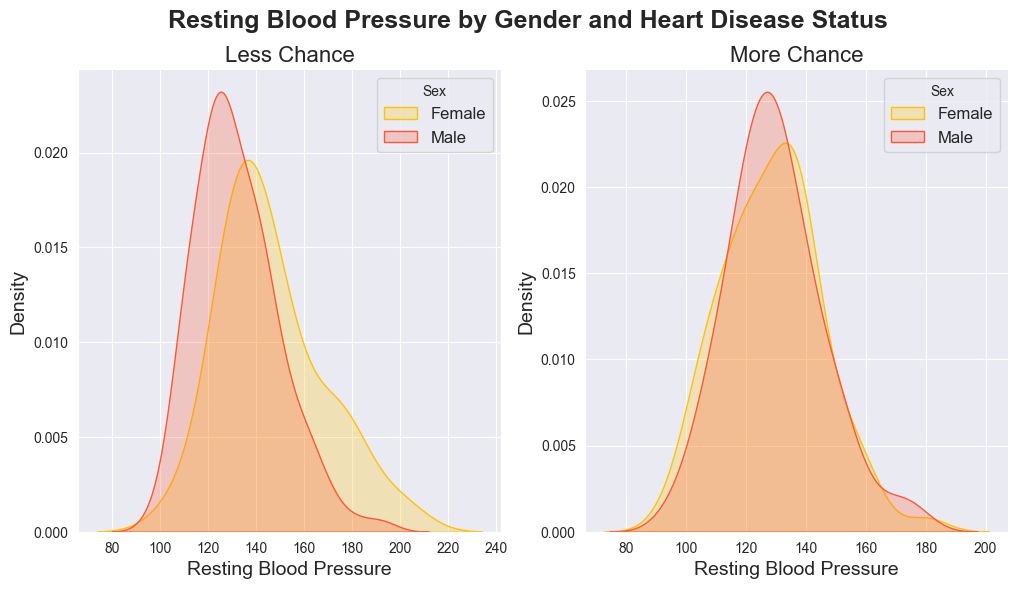

In [18]:
# create a custom color palette with shades of orange and red
palette = sns.color_palette(["#FFC300", "#FF5733"])

# set the style and color palette of the plot
sns.set_style("darkgrid")
sns.set_palette(palette)

# create a figure and axis object with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# create the kde plots for target = 0 and target = 1
sns.kdeplot(data[data['target']==0][data['sex']==0]['trestbps'], shade=True, ax=ax1, label='Female')
sns.kdeplot(data[data['target']==0][data['sex']==1]['trestbps'], shade=True, ax=ax1, label='Male')
sns.kdeplot(data[data['target']==1][data['sex']==0]['trestbps'], shade=True, ax=ax2, label='Female')
sns.kdeplot(data[data['target']==1][data['sex']==1]['trestbps'], shade=True, ax=ax2, label='Male')

# set the labels and legends for each subplot
ax1.set_xlabel('Resting Blood Pressure', fontsize=14)
ax1.set_ylabel('Density', fontsize=14)
ax1.set_title('Less Chance', fontsize=16)
ax1.legend(title='Sex', fontsize=12)

ax2.set_xlabel('Resting Blood Pressure', fontsize=14)
ax2.set_ylabel('Density', fontsize=14)
ax2.set_title('More Chance', fontsize=16)
ax2.legend(title='Sex', fontsize=12)

# remove the top and right spines from each subplot
sns.despine(ax=ax1)
sns.despine(ax=ax2)

# set the title
plt.suptitle('Resting Blood Pressure by Gender and Heart Disease Status', fontsize=18, fontweight='bold')

# show the plot
plt.show()


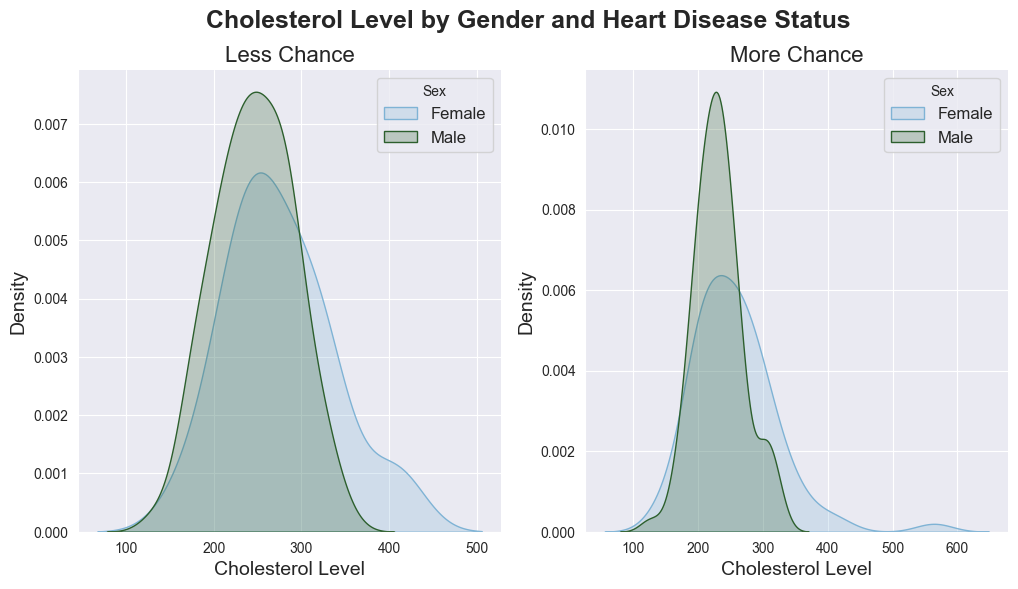

In [19]:
# create a custom color palette with shades of blue and green
palette = sns.color_palette(["#7FB3D5", "#2C5F2D"])

# set the style and color palette of the plot
sns.set_style("darkgrid")
sns.set_palette(palette)

# create a figure and axis object with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# create the KDE plots for target = 0 and target = 1
sns.kdeplot(x=data[data['target']==0][data['sex']==0]['chol'], shade=True, label='Female', ax=ax1)
sns.kdeplot(x=data[data['target']==0][data['sex']==1]['chol'], shade=True, label='Male', ax=ax1)

sns.kdeplot(x=data[data['target']==1][data['sex']==0]['chol'], shade=True, label='Female', ax=ax2)
sns.kdeplot(x=data[data['target']==1][data['sex']==1]['chol'], shade=True, label='Male', ax=ax2)

# set the labels and legends for each subplot
ax1.set_xlabel('Cholesterol Level', fontsize=14)
ax1.set_ylabel('Density', fontsize=14)
ax1.set_title('Less Chance', fontsize=16)
ax1.legend(title='Sex', fontsize=12)

ax2.set_xlabel('Cholesterol Level', fontsize=14)
ax2.set_ylabel('Density', fontsize=14)
ax2.set_title('More Chance', fontsize=16)
ax2.legend(title='Sex', fontsize=12)

# remove the top and right spines from each subplot
sns.despine(ax=ax1)
sns.despine(ax=ax2)

# set the title
plt.suptitle('Cholesterol Level by Gender and Heart Disease Status', fontsize=18, fontweight='bold')

# show the plot
plt.show()
